In [19]:
# Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
# information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
# resting blood pressure, serum cholesterol, and maximum heart rate achieved.
# Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
# usp=share_link
# Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
# numerical features if necessary.


import seaborn as sns
import pandas as pd
df=pd.read_csv("dataset.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
## independent and dependent feature
X=df.drop(labels=['target'],axis=1)
y=df.target

In [23]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
# Q2. Split the dataset into a training set (70%) and a test set (30%).

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [26]:
# Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
# tree. Use the default values for other hyperparameters.




In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train, y_train)



RandomForestClassifier(max_depth=10)

In [28]:
# Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.



from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


y_pred = rfc.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [29]:
accuracy,precision,recall,f1

(0.8461538461538461, 0.86, 0.86, 0.8599999999999999)

In [30]:
# Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
# disease risk. Visualise the feature importances using a bar chart.

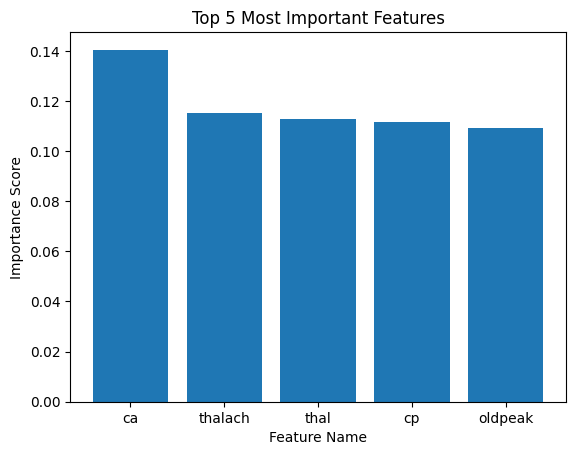

In [31]:
import matplotlib.pyplot as plt


feature_names = df.columns
importances = rfc.feature_importances_
sorted_indices = importances.argsort()[::-1]
top_feature_names = [feature_names[i] for i in sorted_indices[:5]]


plt.bar(top_feature_names, importances[sorted_indices][:5])
plt.title("Top 5 Most Important Features")
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.show()



In [32]:
# Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
# different values of the number of trees, maximum depth, minimum samples split, and minimum samples
# leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, param_grid=param_dist, cv=5)
grid_search.fit(X_train, y_train)
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, cv=5, n_iter=10)
random_search.fit(X_train, y_train)
print("Best hyperparameters (grid search): ", grid_search.best_params_)
print("Best hyperparameters (random search): ", random_search.best_params_)


Best hyperparameters (grid search):  {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best hyperparameters (random search):  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5}


In [33]:
# Q7. Report the best set of hyperparameters found by the search and the corresponding performance
# metrics. Compare the performance of the tuned model with the default model.


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, param_grid=param_dist, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
rfc_tuned = RandomForestClassifier(**best_params)
rfc_tuned.fit(X_train, y_train)
y_pred_tuned = rfc_tuned.predict(X_test)


accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print("Best hyperparameters: ", best_params)
print("Accuracy: ", accuracy_tuned)
print("Precision: ", precision_tuned)
print("Recall: ", recall_tuned)
print("F1 score: ", f1_tuned)


rfc_default = RandomForestClassifier()
rfc_default.fit(X_train, y_train)


y_pred_default = rfc_default.predict(X_test)

accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)


print("Accuracy (default): ", accuracy_default)
print("Precision (default): ", precision_default)
print("Recall (default): ", recall_default)
print("F1 score (default): ", f1_default)


Best hyperparameters:  {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy:  0.8351648351648352
Precision:  0.8301886792452831
Recall:  0.88
F1 score:  0.8543689320388349
Accuracy (default):  0.8241758241758241
Precision (default):  0.8269230769230769
Recall (default):  0.86
F1 score (default):  0.8431372549019608


In [ ]:
# Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
# decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
# limitations of the model for predicting heart disease risk.



import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train, y_train)


top_features_idx = np.argsort(rfc.feature_importances_)[::-1][:2]
feature1 = X_test[:, top_features_idx[0]]
feature2 = X_test[:, top_features_idx[1]]


x_min, x_max = feature1.min() - 0.1, feature1.max() + 0.1
y_min, y_max = feature2.min() - 0.1, feature2.max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))


Z = rfc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


plt.scatter(feature1, feature2, c=y_test, cmap='coolwarm', alpha=0.5)


plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.2)
plt.colorbar()


plt.xlabel(feature_names[top_features_idx[0]])
plt.ylabel(feature_names[top_features_idx[1]])

plt.show()
